# Creating Application-oriented Analyses Using Tax Data (Python)

In [1]:
#Added this to show graphs in the notebook
%matplotlib inline

## Importing and exploring the world's top incomes dataset

In [2]:
#Import the needed libraries
import csv

In [3]:
#Load the data into a data variable
data_file = "income_dist.csv"

with open(data_file, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    data = list(reader)

In [4]:
#Get the length of the data variable. This provides
#  the number of records in the data set
len(data)

2180

In [5]:
#Print the fieldnames or column headers out
print(reader.fieldnames)
len(reader.fieldnames)

['Country', 'Year', 'Top 10% income share', 'Top 10% income share-LAD', 'Top 10% income share-tax units', 'Top 10% income share-adults', 'Top 5% income share', 'Top 5% income share-LAD', 'Top 5% income share-tax units', 'Top 5% income share-adults', 'Top 1% income share', 'Top 1% income share-LAD', 'Top 1% income share-tax units', 'Top 1% income share-adults', 'Top 0.5% income share', 'Top 0.5% income share-LAD', 'Top 0.5% income share-tax units', 'Top 0.5% income share-adults', 'Top 0.1% income share', 'Top 0.1% income share-LAD', 'Top 0.1% income share-tax units', 'Top 0.1% income share-adults', 'Top 0.05% income share', 'Top 0.05% income share-tax units', 'Top 0.05% income share-adults', 'Top 0.01% income share', 'Top 0.01% income share-LAD', 'Top 0.01% income share-tax units', 'Top 0.01% income share-adults', 'Top 0.25% income share', 'Top 0.15% income share', 'Top 10-5% income share', 'Top 10-5% income share-LAD', 'Top 10-5% income share-tax units', 'Top 10-5% income share-adults'

354

In [6]:
#Create a function to load the data set
def dataset(path):
    with open(path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            yield row

In [7]:
#Print the unique coutries from the Country
#  column. Unique countries are obtained through
#  the set function
print(set([row["Country"] for row in dataset(data_file)]))

{'Netherlands', 'New Zealand', 'Denmark', 'United States', 'Ireland', 'Mauritius', 'Norway', 'Finland', 'Portugal', 'Tanzania', 'United Kingdom', 'South Africa', 'China', 'Japan', 'Switzerland', 'Australia', 'Germany', 'Italy', 'Canada', 'Argentina', 'Spain', 'Singapore', 'France', 'Indonesia', 'India', 'Sweden'}


In [8]:
#Get the minimum year
print(min(set([int(row["Year"]) for row in dataset(data_file)])))

1875


In [9]:
#Get the maximum year
print(max(set([int(row["Year"]) for row in dataset(data_file)])))

2010


In [10]:
#Filter out just data for the USA
filter(lambda row: row["Country"] == "United States", dataset(data_file))

In [11]:
#Import libraries needed for graphing
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Redefine the import function. This function now allows
#  for a field and value to filter on
def dataset(path, filter_field=None, filter_value=None):
    with open(path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        if filter_field:
            for row in filter(lambda row: row[filter_field] == filter_value, reader):
                yield row
        else:
            for row in reader:
                yield row

In [13]:
#Create a graph of the Average US income from 1913-2008
def main(path):
    data = [(row["Year"], float(row["Average income per tax unit"])) for row in dataset(path, "Country", "United States")]
    
    width = 0.35
    ind = np.arange(len(data))
    fig = plt.figure()
    ax = plt.subplot(111)
    
    ax.bar(ind, list(d[1] for d in data))
    ax.set_xticks(np.arange(0, len(data), 4))
    ax.set_xticklabels(list(d[0] for d in data)[0::4], rotation=45)
    ax.set_ylabel("Income in USD")
    plt.title("U.S. Average Income 1913-2008")
    
    plt.show()

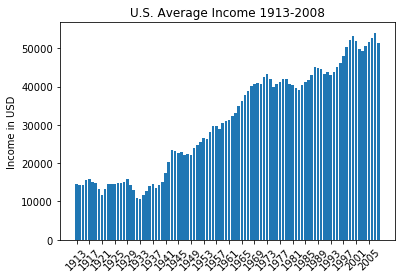

In [14]:
main("income_dist.csv")

In [15]:
import numpy as np
dataset = np.recfromcsv(data_file, skip_header=1)
dataset

rec.array([ (b'Argentina', 1933,    nan,  nan,  nan,  nan,    nan,  nan,  nan,  nan,  17.18,  nan,  nan,  nan,  13.35,  nan,  nan,  nan,  6.8 ,  nan,  nan,  nan,  nan,  nan,  nan,  2.39,  nan,  nan, False,  nan,  nan,    nan,  nan,  nan,  nan,    nan,  nan,  nan,  nan,  3.83,  nan,  nan,  nan,  6.55,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, False,  4.41,  nan,  nan, False,    nan,  nan,    nan,  nan,    nan,  nan,    nan,  nan,    nan,  nan,  nan,   nan,  nan,    nan,  nan,    nan,  nan,   nan,  nan,   nan,  nan,  nan,  nan,   nan,  nan,    nan,  nan,  nan,  nan,   nan,   nan,  nan,  nan,  nan,  nan,  nan,   nan,  nan,    nan,  nan,  nan,  nan,    nan,  nan,  nan,  nan,   nan,   nan,  nan,  nan,  nan,  nan,  nan,   nan,  nan,    nan,  nan,  nan,  nan,    nan,  nan,  nan,  nan,   nan,   nan,  nan,  nan,  nan,  nan,  nan,   nan,  nan,    nan,  nan,  nan,  nan,    nan,  nan,  nan,  nan,   nan,   nan,  nan,  nan,  nan,  nan,  nan,   nan,  nan,    nan,  nan,  nan,  nan,    nan,  nan,

In [16]:
dataset.size

2179

In [17]:
dataset.shape

(2179,)

## Analyzing and visualizing the top income data of the US
The code below generates a line chart showing how the top X% of income has changed over the years.

In addition some helper functions are created that will be used throughout the rest of the code.

The primary two are dataset which loads the data and filters it by country. The default is USA.

The secound function is timeseries which creates an array of year and whatever value you want to pull out of the data set. This makes graphing easier.

In [18]:
def dataset(path, country = "United States"):
    """
    Extract the data for the country provided. Default is United
      States
    """
    with open(path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in filter(lambda row: row["Country"]==country, reader):
            yield row
            
def timeseries(data, column):
    """
    Creates a year based time series for the given column.
    """
    for row in filter(lambda row: row[column], data):
        yield(int(row["Year"]), row[column])
        
def linechart(series, **kwargs):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)
    
    for line in series:
        line = list(line)
        xvals = [v[0] for v in line]
        yvals = [v[1] for v in line]
        ax.plot(xvals, yvals)
        
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs['ylabel'])
        
    if 'title' in kwargs:
        plt.title(kwargs['title'])
        
    if 'labels' in kwargs:
        ax.legend(kwargs.get('labels'))
        
    return fig

def percent_income_share(source):
    """
    Create Income Share chart
    """
    columns = {
        "Top 10% income share",
        "Top 5% income share",
        "Top 1% income share",
        "Top 0.5% income share",
        "Top 0.1% income share",
    }
    source = list(dataset(source))
    
    return linechart([timeseries(source, col) for col in columns],
                    labels = columns,
                    title="U.S. Percentage Income Share",
                    ylabel="Percentage")

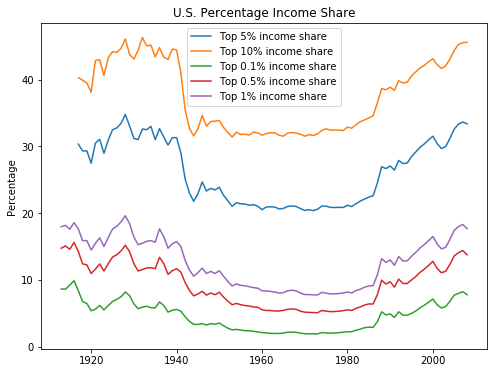

In [19]:
percent_income_share(data_file)
plt.show()

In this section the income share is normalized and then graphed by year. The data is normalized to get everything on the same playing field.

In [20]:
def normalize(data):
    """
    Normalizes the data set. Expects a timeseries input
    """
    data = list(data)
    norm = np.array(list(d[1] for d in data), dtype="float64")
    mean = norm.mean()
    norm /= mean
    return zip((d[0] for d in data), norm)

def mean_normalized_percent_income_share(source):
    columns = {
        "Top 10% income share",
        "Top 5% income share",
        "Top 1% income share",
        "Top 0.5% income share",
        "Top 0.1% income share",
    }
    source = list(dataset(source))
    
    return linechart([normalize(timeseries(source, col)) for col in columns],
                    labels = columns,
                    title="Mean Normalized U.S. Percentage Income Share",
                    ylabel="Percentage")

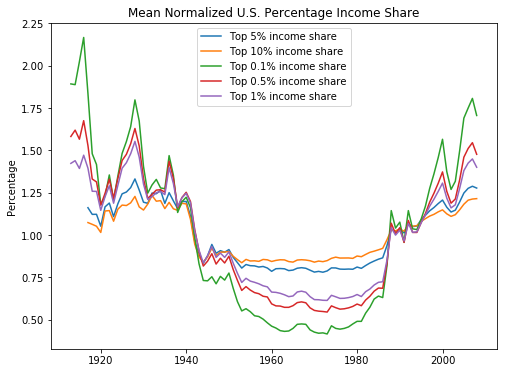

In [21]:
mean_normalized_percent_income_share(data_file)
plt.show()

The code below generates a time series of  capital gains lift. This is the difference between the income share including capital gains and teh regular income share.

In this section a helper function was created delta that generates a time series with the difference as the second value.

In [22]:
def delta(first, second):
    """
    Returns an array of deltas for the two arrays.
    """
    first = list(first)
    years = yrange(first)
    first = np.array(list(d[1] for d in first), dtype="float64")
    second = np.array(list(d[1] for d in second), dtype="float64")
    
    # Do not use this in production
    if first.size != second.size:
        first = np.insert(first, [0,0,0,0], [None, None, None, None])
        
    diff = first - second
    return zip(years, diff)
    
def yrange(data):
    """
    Get the range of years from the dataset
    """
    years = set()
    for row in data:
        if row[0] not in years:
            yield row[0]
            years.add(row[0])
            
def capital_gains_lift(source):
    """
    Computes capital gains lift in top income percentages over
      time chart
    """
    columns = (
        ("Top 10% income share-including capital gains", "Top 10% income share"),
        ("Top 5% income share-including capital gains", "Top 5% income share"),
        ("Top 1% income share-including capital gains", "Top 1% income share"),
        ("Top 0.5% income share-including capital gains", "Top 0.5% income share"),
        ("Top 0.1% income share-including capital gains", "Top 0.1% income share"),
        ("Top 0.05% income share-including capital gains", "Top 0.05% income share"),
    )
    
    source = list(dataset(source))
    series = [delta(timeseries(source, a), timeseries(source, b)) for a,b in columns]
    
    return linechart(series, labels=list(col[1] for col in columns), 
                     title="U.S. Capital Gains Income Lift",
                     ylabel="Percentage Difference")

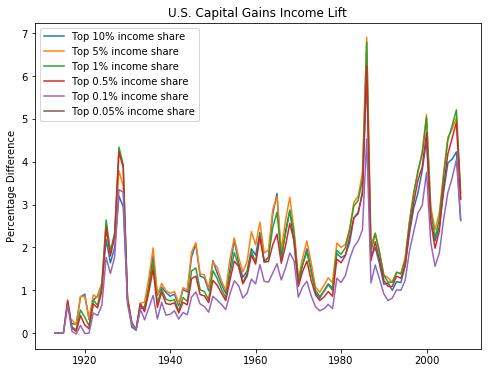

In [23]:
capital_gains_lift(data_file)
plt.show()

## Furthering the analysis of the top income groups of the US

In [24]:
def average_incomes(source):
    """
    Compares percentage average incomes
    """
    columns = {
        "Top 10% average income",
        "Top 5% average income",
        "Top 1% average income",
        "Top 0.5% average income",
        "Top 0.1% average income",
        "Top 0.05% average income",
    }
    
    source = list(dataset(source))
    
    return linechart([timeseries(source, col) for col in columns],
                    labels=columns, title="U.S. Average Income",
                    ylabel="2008 US Dollars")

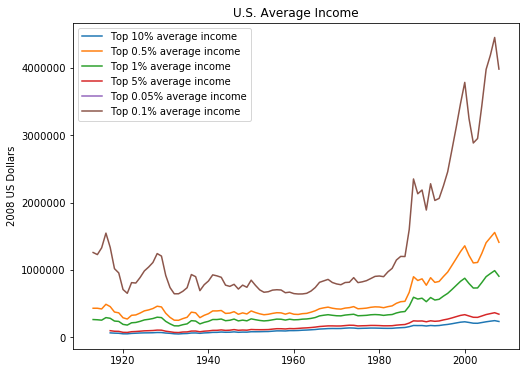

In [25]:
average_incomes(data_file)
plt.show()

The code below creates a graph that shows the difference in average income to the top .1 average income.

In [26]:
def average_top_income_lift(source):
    """
    Compares top percentage avg income over total avg
    """
    columns = (
        ("Top 10% average income", "Top 0.1% average income"),
        ("Top 5% average income", "Top 0.1% average income"),
        ("Top 1% average income", "Top 0.1% average income"),
        ("Top 0.5% average income", "Top 0.1% average income"),
        ("Top 0.1% average income", "Top 0.1% average income"),
    )
    
    source = list(dataset(source))
    series  = [delta(timeseries(source, a), timeseries(source, b)) for a, b in columns]
    
    return linechart(series,
                    labels=list(col[0] for col in columns),
                    title="U.S. Income Disparity",
                    ylabel="2008 US Dollars")

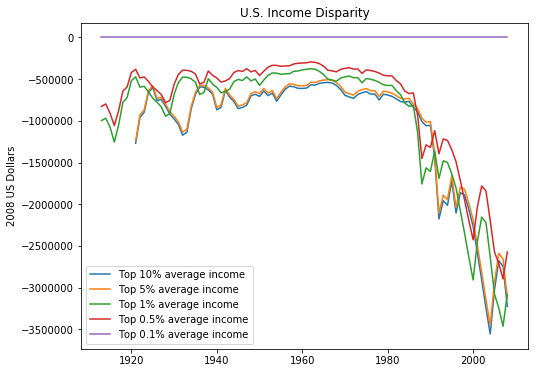

In [27]:
average_top_income_lift(data_file)
plt.show()

The code below creates a stacked area graph on 5 fields on the top 10% income composition from the US.

A stacked graph shows the percentage as a whole over time.

In [28]:
def stackedarea(series, **kwargs):
    fig = plt.figure()
    axe = fig.add_subplot(111)
    
    fnx = lambda s: np.array(list(v[1] for v in s), dtype="float64")
    yax = np.row_stack(fnx(s) for s in series)
    xax = np.arange(1917,2008)
    
    polys = axe.stackplot(xax, yax)
    axe.margins(0,0)
    
    if 'ylabel' in kwargs:
        axe.set_ylabel(kwargs['ylabel'])
        
    if 'labels' in kwargs:
        legendProxies = []
        for poly in polys:
            legendProxies.append(plt.Rectangle((0, 0), 1,1, fc=poly.get_facecolor()[0]))
            
        axe.legend(legendProxies, kwargs.get('labels'))
        
    if 'title' in kwargs:
        plt.title(kwargs['title'])
        
    return fig

def income_composition(source):
    """
    Compare income composition
    """
    
    columns = (
        "Top 10% income composition-Wages, salaries and pensions",
        "Top 10% income composition-Dividends",
        "Top 10% income composition-Interest Income",
        "Top 10% income composition-Rents",
        "Top 10% income composition-Entrepreneurial income",
    )
    
    source = list(dataset(source))
    
    labels = ("Salary", "Dividends", "Interest", "Rent", "Business")
    
    return stackedarea([timeseries(source, col) for col in columns],
                      labels = labels,
                      title="U.S. Top 10% Income Composition",
                      ylabel="Percentage")

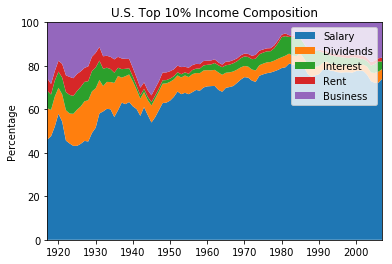

In [29]:
#Display graph
income_composition(data_file)
plt.show()